# Usage of download_compose Module
Tianzhe Zhou 2024/11/9

[CompOSE](https://compose.obspm.fr/table)(CompStar Online Supernovae Equations of State)
is a database that provides data tables for different state of the art equations of state (EoS) ready for further usage in astrophysical applications, nuclear physics and beyond.

In this notebook, we will demonstrate how to use the `download_compose` module to download the data from the CompOSE database.

In [1]:
# First, import the class that we need to use
from EOSgenerators.download_compose import DownloadCompose

# Then, create an instance of the class
# This will automatically fetch the latest version of all available
# EOS names and their corresponding download links
dc = DownloadCompose()

DownloadCompose: Fetching data from https://compose.obspm.fr/table 
...
DownloadCompose: Find 308 EOS data on website https://compose.obspm.fr/table


In [2]:
# Now, we can print the list of available EOS names.
# Each EOS name is related to a specific identifier,
# which we can use later to actually download the EOS data file.
dc.print_eos_list()

id =   1, name = HS(DD2) neutron matter (no electrons)
id =   2, name = HS(DD2) neutron matter (with electrons)
id =   3, name = HS(FSG) neutron matter (no electrons)
id =   4, name = HS(FSG) neutron matter (with electrons)
id =   5, name = HS(IUF) neutron matter (no electrons)
id =   6, name = HS(IUF) neutron matter (with electrons)
id =   7, name = HS(NL3) neutron matter (no electrons)
id =   8, name = HS(NL3) neutron matter (with electrons)
id =   9, name = HS(TM1) neutron matter  (no electrons)
id =  10, name = HS(TM1) neutron matter (with electrons)
id =  11, name = HS(TMA) neutron matter (no electrons)
id =  12, name = HS(TMA) neutron matter (with electrons)
id =  13, name = SFH(SFHo) neutron matter (no electrons)
id =  14, name = SFH(SFHo) neutron matter (with electrons)
id =  15, name = SFH(SFHx) neutron matter (no electrons)
id =  16, name = SFH(SFHx) neutron matter (with electrons)
id =  17, name = HS(DD2) (no electrons)
id =  18, name = HS(DD2) (with electrons)
id =  19, nam

In [3]:
# Now we pick the EOS with identifier 316 and download it.
id = 316
eosdir = dc.download_id(id)

downloads\compose\316\eos.t already exists, skip download https://compose.obspm.fr/download/1D/Crust/M2/eos.t
downloads\compose\316\eos.nb already exists, skip download https://compose.obspm.fr/download/1D/Crust/M2/eos.nb
downloads\compose\316\eos.thermo already exists, skip download https://compose.obspm.fr/download/1D/Crust/M2/eos.thermo


	 Nucleon masses used within the CompOSE tables :	 m_n = 938.90000 MeV and m_p = 938.90000 MeV


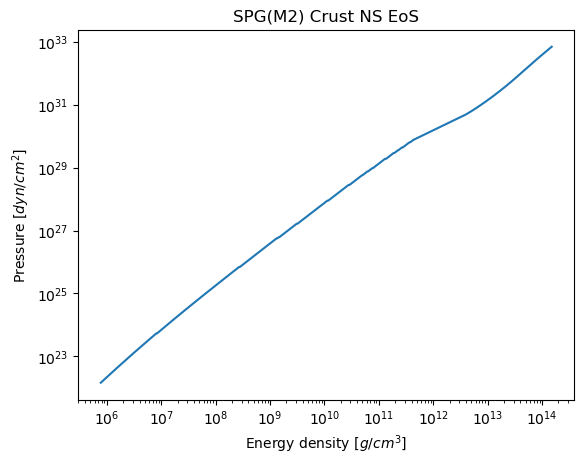

In [4]:
# We use Compose_eos function to extract the EOS data from the downloaded file
from EOSgenerators import Compose_eos
import matplotlib.pyplot as plt

eosdir = dc.eos_download_dir(id).as_posix()
eps, p, name = Compose_eos.read_compose(eosdir=eosdir, eosname=dc.eos_name(id))

# Finally, we can plot the EOS data using matplotlib,
# to ensure that all the previous steps were successful.
plt.figure(dpi=100)
plt.plot(eps, p)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy density [$g/cm^3$]")
plt.ylabel("Pressure [$dyn/cm^2$]")
plt.title(name)
plt.show()